<a href="https://www.pieriandata.com"><img src="../Pierian_Data_Logo.PNG"></a>
<strong><center>Copyright by Pierian Data Inc.</center></strong> 
<strong><center>Created by Jose Marcial Portilla.</center></strong>

# Keras API Project Exercise

## The Data

We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

## NOTE: Do not download the full zip from the link! We provide a special version of this file that has some extra feature engineering for you to do. You won't be able to follow along with the original file!

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

The "loan_status" column contains our label.

### Data Overview

----
-----
There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

## Starter Code

#### Note: We also provide feature information on the data as a .csv file for easy lookup throughout the notebook:

In [1]:
import pandas as pd

In [2]:
data_info = pd.read_csv('lending_club_info-Copy1.csv',index_col='LoanStatNew')
data_info

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when ap...
emp_length,Employment length in years. Possible values ar...
home_ownership,The home ownership status provided by the borr...


In [3]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [4]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [5]:
feat_info('mort_acc')

Number of mortgage accounts.


## Loading the data and other imports

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# might be needed depending on your version of Jupyter
%matplotlib inline

In [7]:
df = pd.read_csv('lending_club_loan_two-Copy1.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
loan_amnt               396030 non-null float64
term                    396030 non-null object
int_rate                396030 non-null float64
installment             396030 non-null float64
grade                   396030 non-null object
sub_grade               396030 non-null object
emp_title               373103 non-null object
emp_length              377729 non-null object
home_ownership          396030 non-null object
annual_inc              396030 non-null float64
verification_status     396030 non-null object
issue_d                 396030 non-null object
loan_status             396030 non-null object
purpose                 396030 non-null object
title                   394275 non-null object
dti                     396030 non-null float64
earliest_cr_line        396030 non-null object
open_acc                396030 non-null float64
pub_rec                 396030 non-nu

# Project Tasks

**Complete the tasks below! Keep in mind is usually more than one way to complete the task! Enjoy**

-----
------

# Section 1: Exploratory Data Analysis

**OVERALL GOAL: Get an understanding for which variables are important, view summary statistics, and visualize the data**


----

**TASK: Since we will be attempting to predict loan_status, create a countplot as shown below.**

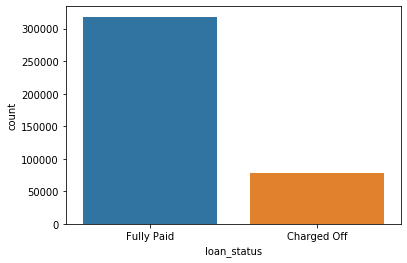

In [9]:
sns.countplot(data=df,x='loan_status')  # this is a fairly balanced classification anything havinhg 15% of data in each class 

**TASK: Create a histogram of the loan_amnt column.**

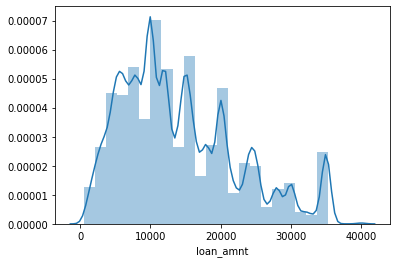

In [10]:
sns.distplot(df['loan_amnt'],bins=25)

**TASK: Let's explore correlation between the continuous feature variables. Calculate the correlation between all continuous numeric variables using .corr() method.**

In [11]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


**TASK: Visualize this using a heatmap. Depending on your version of matplotlib, you may need to manually adjust the heatmap.**

* [Heatmap info](https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap)
* [Help with resizing](https://stackoverflow.com/questions/56942670/matplotlib-seaborn-first-and-last-row-cut-in-half-of-heatmap-plot)

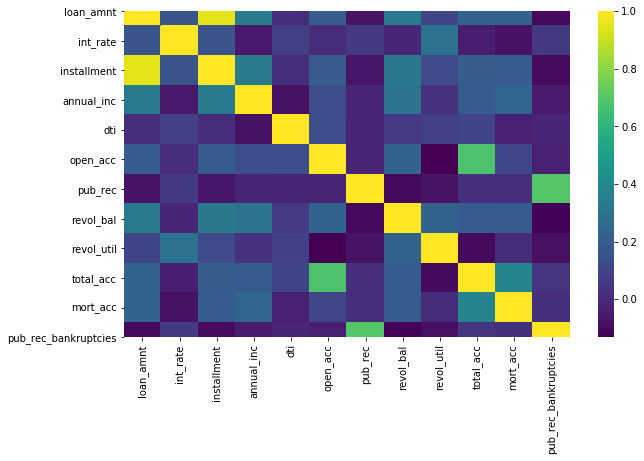

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cmap='viridis')  # as we can see the installment is perfectly correlated with loan_amnt

**TASK: You should have noticed almost perfect correlation with the "installment" feature. Explore this feature further. Print out their descriptions and perform a scatterplot between them. Does this relationship make sense to you? Do you think there is duplicate information here?**

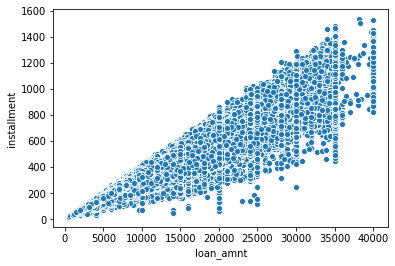

In [13]:
sns.scatterplot(data=df,x='loan_amnt',y='installment')

**TASK: Create a boxplot showing the relationship between the loan_status and the Loan Amount.**

In [14]:
# CODE HERE

**TASK: Calculate the summary statistics for the loan amount, grouped by the loan_status.**

In [15]:
# CODE HERE

**TASK: Let's explore the Grade and SubGrade columns that LendingClub attributes to the loans. What are the unique possible grades and subgrades?**

In [16]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

**TASK: Create a countplot per grade. Set the hue to the loan_status label.**

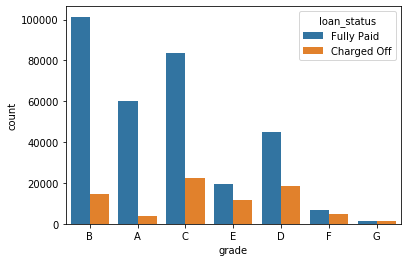

In [17]:
sns.countplot(data=df,x='grade',hue='loan_status')  # we can see that as we move from A se G the no of people who didnt pay of 
#the loan increases maybe somhow these grades are related to the risk factor involved during lending loans .A grade is the on 
#ewith the lowest riisk and progesively the risk increases----ASSUMPTION 1

**TASK: Display a count plot per subgrade. You may need to resize for this plot and [reorder](https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot) the x axis. Feel free to edit the color palette. Explore both all loans made per subgrade as well being separated based on the loan_status. After creating this plot, go ahead and create a similar plot, but set hue="loan_status"**

In [18]:
#CODE HERE

In [19]:
# CODE HERE

**TASK: It looks like F and G subgrades don't get paid back that often. Isloate those and recreate the countplot just for those subgrades.**

In [20]:
# CODE HERE

**TASK: Create a new column called 'loan_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off".**

In [21]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [22]:
def loan_repaid(stat):
    if stat[0]=='F':
        rep=1
    else:
        rep=0
    return rep
df['loan_repaid']=df['loan_status'].apply(loan_repaid)
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


**CHALLENGE TASK: (Note this is hard, but can be done in one line!) Create a bar plot showing the correlation of the numeric features to the new loan_repaid column. [Helpful Link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html)**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

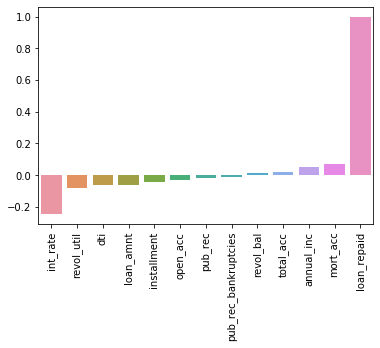

In [23]:
#sns.barplot(x=df.corr()['loan_repaid'].inde
sns.barplot(x=df.corr()['loan_repaid'].sort_values().index,y=df.corr()['loan_repaid'].sort_values().values)
plt.xticks(rotation=90)

---
---
# Section 2: Data PreProcessing

**Section Goals: Remove or fill any missing data. Remove unnecessary or repetitive features. Convert categorical string features to dummy variables.**



# Missing Data

**Let's explore this missing data columns. We use a variety of factors to decide whether or not they would be useful, to see if we should keep, discard, or fill in the missing data.**

**TASK: What is the length of the dataframe?**

**TASK: Create a Series that displays the total count of missing values per column.**

In [24]:
df.isnull().sum().sort_values(ascending=False)

mort_acc                37795
emp_title               22927
emp_length              18301
title                    1755
pub_rec_bankruptcies      535
revol_util                276
loan_repaid                 0
issue_d                     0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
purpose                     0
loan_status                 0
address                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
total_acc                   0
initial_list_status         0
application_type            0
loan_amnt                   0
dtype: int64

**TASK: Convert this Series to be in term of percentage of the total DataFrame**

In [25]:
x=(df.isnull().sum()/len(df))*100
x.sort_values(ascending=False)
# emp_title and emp_length both are ctegorical values with mutiple categories we cna fill them up or else we can just drop those 
#ecolumns or we could extract features from it



mort_acc                9.543469
emp_title               5.789208
emp_length              4.621115
title                   0.443148
pub_rec_bankruptcies    0.135091
revol_util              0.069692
loan_repaid             0.000000
issue_d                 0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
purpose                 0.000000
loan_status             0.000000
address                 0.000000
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
loan_amnt               0.000000
dtype: float64

**TASK: Let's examine emp_title and emp_length to see whether it will be okay to drop them. Print out their feature information using the feat_info() function from the top of this notebook.**

In [26]:
# CODE HERE

**TASK: How many unique employment job titles are there?**

In [27]:
#df.groupby('emp_title')['annual_inc'].describe().tail(10)  # as we can see that there are many categories many unique values
len(df['emp_title'].unique())
 

173106

## # we can see that ther as 1.7 lakh different jo roles so we clearly cant fill the missing values one thing which we could have done is do some NLP and categorize the roles base don sector and divide the roles into different sector ,extract that feature and drop this emp_title.since we cant fill emp_title so there is no point in filling emp_length caus eit is tthe experience of employee in each field 

**TASK: Realistically there are too many unique job titles to try to convert this to a dummy variable feature. Let's remove that emp_title column.**

In [28]:
# CODE HERE

**TASK: Create a count plot of the emp_length feature column. Challenge: Sort the order of the values.**

In [29]:
# CODE HERE

**TASK: Plot out the countplot with a hue separating Fully Paid vs Charged Off**

In [30]:
# CODE HERE

**CHALLENGE TASK: This still doesn't really inform us if there is a strong relationship between employment length and being charged off, what we want is the percentage of charge offs per category. Essentially informing us what percent of people per employment category didn't pay back their loan. There are a multitude of ways to create this Series. Once you've created it, see if visualize it with a [bar plot](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html). This may be tricky, refer to solutions if you get stuck on creating this Series.**

In [31]:
ind_stat=df.groupby('emp_length')['loan_status'].value_counts().index
val_stat=df.groupby('emp_length')['loan_status'].value_counts().values
val_stat
ind_stat

MultiIndex([(   '1 year',  'Fully Paid'),
            (   '1 year', 'Charged Off'),
            ('10+ years',  'Fully Paid'),
            ('10+ years', 'Charged Off'),
            (  '2 years',  'Fully Paid'),
            (  '2 years', 'Charged Off'),
            (  '3 years',  'Fully Paid'),
            (  '3 years', 'Charged Off'),
            (  '4 years',  'Fully Paid'),
            (  '4 years', 'Charged Off'),
            (  '5 years',  'Fully Paid'),
            (  '5 years', 'Charged Off'),
            (  '6 years',  'Fully Paid'),
            (  '6 years', 'Charged Off'),
            (  '7 years',  'Fully Paid'),
            (  '7 years', 'Charged Off'),
            (  '8 years',  'Fully Paid'),
            (  '8 years', 'Charged Off'),
            (  '9 years',  'Fully Paid'),
            (  '9 years', 'Charged Off'),
            ( '< 1 year',  'Fully Paid'),
            ( '< 1 year', 'Charged Off')],
           names=['emp_length', 'loan_status'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

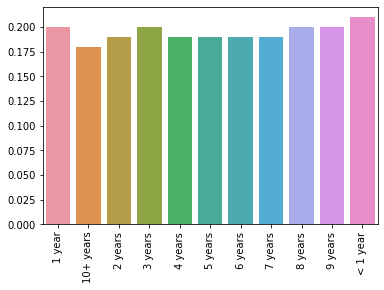

In [32]:
ind=list()
val=list()

for i in range(0,len(ind_stat),2):
    x=ind_stat[[i,i+1]]
    y=val_stat[[i,i+1]]
    z=(y[1]/sum(y)).round(2)
    ind.append(x[0][0])
    
    val.append(z)
            
sns.barplot(x=ind,y=val)   
plt.xticks(rotation=90)
# as we can see that they are quite evenly distributed so we cant extract any useful feature from emp_length also there are
#tons of misisng value sos lets just drop that col

In [33]:
len(ind_stat)

22

**TASK: Charge off rates are extremely similar across all employment lengths. Go ahead and drop the emp_length column.**

In [34]:
df=df.drop(['emp_length','emp_title'],axis=1)

**TASK: Revisit the DataFrame to see what feature columns still have missing data.**

In [35]:
df.isnull().sum().sort_values()

loan_amnt                   0
application_type            0
initial_list_status         0
total_acc                   0
revol_bal                   0
pub_rec                     0
open_acc                    0
earliest_cr_line            0
dti                         0
address                     0
purpose                     0
loan_repaid                 0
issue_d                     0
verification_status         0
annual_inc                  0
home_ownership              0
sub_grade                   0
grade                       0
installment                 0
int_rate                    0
term                        0
loan_status                 0
revol_util                276
pub_rec_bankruptcies      535
title                    1755
mort_acc                37795
dtype: int64

**TASK: Review the title column vs the purpose column. Is this repeated information?**

In [36]:
# CODE HERE

In [37]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

**TASK: The title column is simply a string subcategory/description of the purpose column. Go ahead and drop the title column.**

In [38]:
df=df.drop('title',axis=1)

---
**NOTE: This is one of the hardest parts of the project! Refer to the solutions video if you need guidance, feel free to fill or drop the missing values of the mort_acc however you see fit! Here we're going with a very specific approach.**


---
**TASK: Find out what the mort_acc feature represents**

In [39]:
df['mort_acc']

0         0.0
1         3.0
2         0.0
3         0.0
4         1.0
         ... 
396025    0.0
396026    1.0
396027    0.0
396028    5.0
396029    NaN
Name: mort_acc, Length: 396030, dtype: float64

**TASK: Create a value_counts of the mort_acc column.**

In [40]:
# CODE HERE

**TASK: There are many ways we could deal with this missing data. We could attempt to build a simple model to fill it in, such as a linear model, we could just fill it in based on the mean of the other columns, or you could even bin the columns into categories and then set NaN as its own category. There is no 100% correct approach! Let's review the other columsn to see which most highly correlates to mort_acc**

**TASK: Looks like the total_acc feature correlates with the mort_acc , this makes sense! Let's try this fillna() approach. We will group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry. To get the result below:**

In [41]:
x=df.groupby('total_acc')['mort_acc'].mean()


**CHALLENGE TASK: Let's fill in the missing mort_acc values based on their total_acc value. If the mort_acc is missing, then we will fill in that missing value with the mean value corresponding to its total_acc value from the Series we created above. This involves using an .apply() method with two columns. Check out the link below for more info, or review the solutions video/notebook.**

[Helpful Link](https://stackoverflow.com/questions/13331698/how-to-apply-a-function-to-two-columns-of-pandas-dataframe) 

In [42]:
def mort_filler(total_acc,mort_acc):
    if np.isnan==mort_acc:
        ret=x[total_acc]
    else:
        ret=mort_acc
    return ret
#mort_filler=np.vectorize(mort_filler)

In [43]:
df['mort_acc']=df.apply(lambda df : mort_filler(df['total_acc'],df['mort_acc']),axis=1) # since we had multiple col as input we applied through
# lambda

In [44]:
df['mort_acc']

0         0.0
1         3.0
2         0.0
3         0.0
4         1.0
         ... 
396025    0.0
396026    1.0
396027    0.0
396028    5.0
396029    NaN
Name: mort_acc, Length: 396030, dtype: float64

In [45]:
df=df.dropna()

**TASK: revol_util and the pub_rec_bankruptcies have missing data points, but they account for less than 0.5% of the total data. Go ahead and remove the rows that are missing those values in those columns with dropna().**

## Categorical Variables and Dummy Variables

**We're done working with the missing data! Now we just need to deal with the string values due to the categorical columns.**

**TASK: List all the columns that are currently non-numeric. [Helpful Link](https://stackoverflow.com/questions/22470690/get-list-of-pandas-dataframe-columns-based-on-data-type)**

[Another very useful method call](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html)

In [46]:
df.select_dtypes('object').columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

---
**Let's now go through all the string features to see what we should do with them.**

---


### term feature

**TASK: Convert the term feature into either a 36 or 60 integer numeric data type using .apply() or .map().**

In [47]:
df['term'].value_counts() # since there is a numeric relationship between years /moths lets map them  to numbers 36,60

 36 months    273605
 60 months     84409
Name: term, dtype: int64

In [48]:
df['term']=df['term'].apply(lambda x:int(x[0:3]))

In [49]:
df['term']

0         36
1         36
2         36
3         36
4         60
          ..
396024    36
396025    60
396026    36
396027    36
396028    60
Name: term, Length: 358014, dtype: int64

### grade feature

**TASK: We already know grade is part of sub_grade, so just drop the grade feature.**

In [50]:
df=df.drop('grade',axis=1)

**TASK: Convert the subgrade into dummy variables. Then concatenate these new columns to the original dataframe. Remember to drop the original subgrade column and to add drop_first=True to your get_dummies call.**

In [51]:
df['sub_grade'].value_counts()

B3    23768
B4    23219
C1    21612
C2    20617
B2    20491
C3    19840
B5    19557
C4    19143
B1    17381
C5    17141
A5    15925
D1    15081
A4    12976
D2    12733
D3    11102
D4    10744
D5     8898
A3     8776
A1     8546
A2     8032
E1     7215
E2     6841
E3     5695
E4     4932
E5     4188
F1     3228
F2     2522
F3     2122
F4     1629
F5     1291
G1      960
G2      690
G3      509
G4      328
G5      282
Name: sub_grade, dtype: int64

In [52]:
df[pd.get_dummies(data=df['sub_grade'],drop_first=True).columns]=pd.get_dummies(data=df['sub_grade'],drop_first=True)

In [53]:
df=df.drop('sub_grade',axis=1)

### verification_status, application_type,initial_list_status,purpose 
**TASK: Convert these columns: ['verification_status', 'application_type','initial_list_status','purpose'] into dummy variables and concatenate them with the original dataframe. Remember to set drop_first=True and to drop the original columns.**

In [54]:
df[pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose']],drop_first=True).columns]=pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose']],drop_first=True)

In [55]:
df=df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)

In [56]:
df

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,issue_d,loan_status,dti,earliest_cr_line,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,10000.0,36,11.44,329.48,RENT,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,...,0,0,0,0,0,0,0,0,1,0
1,8000.0,36,11.99,265.68,MORTGAGE,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,RENT,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,...,0,0,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,RENT,54000.0,Nov-2014,Fully Paid,2.60,Sep-2006,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,MORTGAGE,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396024,6000.0,36,13.11,202.49,RENT,64000.0,Mar-2013,Fully Paid,10.81,Nov-1991,...,0,0,0,0,0,0,0,0,0,0
396025,10000.0,60,10.99,217.38,RENT,40000.0,Oct-2015,Fully Paid,15.63,Nov-2004,...,0,0,0,0,0,0,0,0,0,0
396026,21000.0,36,12.29,700.42,MORTGAGE,110000.0,Feb-2015,Fully Paid,21.45,Feb-2006,...,0,0,0,0,0,0,0,0,0,0
396027,5000.0,36,9.99,161.32,RENT,56500.0,Oct-2013,Fully Paid,17.56,Mar-1997,...,0,0,0,0,0,0,0,0,0,0


### home_ownership
**TASK:Review the value_counts for the home_ownership column.**

In [57]:
df['home_ownership'].value_counts()

MORTGAGE    181592
RENT        141604
OWN          34752
OTHER           34
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [58]:
df['home_ownership']=df['home_ownership'].replace(['NONE','ANY'],'OTHER')
df['home_ownership'].value_counts()

MORTGAGE    181592
RENT        141604
OWN          34752
OTHER           66
Name: home_ownership, dtype: int64

**TASK: Convert these to dummy variables, but [replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html) NONE and ANY with OTHER, so that we end up with just 4 categories, MORTGAGE, RENT, OWN, OTHER. Then concatenate them with the original dataframe. Remember to set drop_first=True and to drop the original columns.**

In [59]:
df[pd.get_dummies(df['home_ownership'],drop_first=1).columns]=pd.get_dummies(df['home_ownership'],drop_first=1)

In [60]:
df=df.drop('home_ownership',axis=1)

### address
**TASK: Let's feature engineer a zip code column from the address in the data set. Create a column called 'zip_code' that extracts the zip code from the address column.**

In [61]:
df['zipcode']=df['address'].apply(lambda x:x[-5:])

**TASK: Now make this zip_code column into dummy variables using pandas. Concatenate the result and drop the original zip_code column along with dropping the address column.**

In [62]:
df[pd.get_dummies(df['zipcode'],drop_first=1).columns]=pd.get_dummies(df['zipcode'],drop_first=1)

In [63]:
df=df.drop(['address','zipcode'],axis=1)

### issue_d 

**TASK: This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, drop this feature.**

In [64]:
df=df.drop('issue_d',axis=1)

### earliest_cr_line
**TASK: This appears to be a historical time stamp feature. Extract the year from this feature using a .apply function, then convert it to a numeric feature. Set this new data to a feature column called 'earliest_cr_year'.Then drop the earliest_cr_line feature.**

In [65]:
df['earliest_cr_line'].value_counts()

Aug-2001    2680
Oct-2000    2678
Aug-2000    2671
Oct-2001    2630
Aug-2002    2437
            ... 
Oct-1950       1
Jun-1959       1
Jul-1955       1
Jul-1962       1
Jul-1961       1
Name: earliest_cr_line, Length: 680, dtype: int64

In [66]:
df['earliest_cr_year']=df['earliest_cr_line'].apply(lambda x:int(x[-4:]))

In [67]:
df=df.drop('earliest_cr_line',axis=1)

## Train Test Split

**TASK: Import train_test_split from sklearn.**

In [68]:
from sklearn.model_selection import train_test_split

**TASK: drop the load_status column we created earlier, since its a duplicate of the loan_repaid column. We'll use the loan_repaid column since its already in 0s and 1s.**

In [69]:
df=df.drop(['loan_status'],axis=1)

In [70]:
X=df.drop('loan_repaid',axis=1).values

In [71]:
y=df['loan_repaid'].values

**TASK: Set X and y variables to the .values of the features and label.**

In [72]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

----
----

# OPTIONAL

## Grabbing a Sample for Training Time

### OPTIONAL: Use .sample() to grab a sample of the 490k+ entries to save time on training. Highly recommended for lower RAM computers or if you are not using GPU.

----
----

In [73]:
# df = df.sample(frac=0.1,random_state=101)
print(len(df))

358014


**TASK: Perform a train/test split with test_size=0.2 and a random_state of 101.**

In [74]:
#CODE HERE

## Normalizing the Data

**TASK: Use a MinMaxScaler to normalize the feature data X_train and X_test. Recall we don't want data leakge from the test set so we only fit on the X_train data.**

In [75]:
from sklearn.preprocessing import MinMaxScaler

In [76]:
scale=MinMaxScaler()

In [77]:
X_train=scale.fit_transform(X_train)

In [78]:
X_test=scale.transform(X_test)

In [79]:
df.select_dtypes('object')

""
0
1
2
3
4
...
396024
396025
396026
396027


# Creating the Model

**TASK: Run the cell below to import the necessary Keras functions.**

In [87]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout


array([80.  , 60.25, 40.5 , 20.75,  1.  ])

**TASK: Build a sequential model to will be trained on the data. You have unlimited options here, but here is what the solution uses: a model that goes 78 --> 39 --> 19--> 1 output neuron. OPTIONAL: Explore adding [Dropout layers](https://keras.io/layers/core/) [1](https://en.wikipedia.org/wiki/Dropout_(neural_networks)) [2](https://towardsdatascience.com/machine-learning-part-20-dropout-keras-layers-explained-8c9f6dc4c9ab)**

In [88]:
# CODE HERE
base_model = Sequential()
for i in np.linspace(80,5,5):
    base_model.add(Dense(int(i),activation='relu'))
    base_model.add(Dropout(0.15))


In [89]:
base_model.add(Dense(1,activation='sigmoid'))

## best way to select the neurons and no of neurons in each  dense layers for sequntial networks/feed forward/artifical neural network is around for 100 columns(features)  no of neurons = 100,50,25,12,6,3,1 (final sigmoid one)  #log base 2(no of features) try ith and without dropout and if dropout start with chota values around 0.15,0.2 etc and see if on increasing ,decreasing how it performs

**TASK: Fit the model to the training data for at least 25 epochs. Also add in the validation data for later plotting. Optional: add in a batch_size of 256.**

In [90]:
base_model.compile(optimizer='adam',
    loss='binary_crossentropy')

In [91]:
base_model.fit(x=X_train,y=y_train,batch_size=256,epochs=50,validation_data=(X_test,y_test))

Train on 286411 samples, validate on 71603 samples
Epoch 1/50
286411/286411 [==============================] - 8s 27us/sample - loss: 0.3217 - val_loss: 0.2675
Epoch 2/50
286411/286411 [==============================] - 7s 23us/sample - loss: 0.2762 - val_loss: 0.2664
Epoch 3/50
286411/286411 [==============================] - 6s 23us/sample - loss: 0.2716 - val_loss: 0.2664
Epoch 4/50
286411/286411 [==============================] - 7s 23us/sample - loss: 0.2694 - val_loss: 0.2653
Epoch 5/50
286411/286411 [==============================] - 6s 22us/sample - loss: 0.2685 - val_loss: 0.2659
Epoch 6/50
286411/286411 [==============================] - 6s 23us/sample - loss: 0.2678 - val_loss: 0.2652
Epoch 7/50
286411/286411 [==============================] - 7s 23us/sample - loss: 0.2671 - val_loss: 0.2654
Epoch 8/50
286411/286411 [==============================] - 6s 22us/sample - loss: 0.2667 - val_loss: 0.2644
Epoch 9/50
286411/286411 [==============================] - 7s 23us/sample - 

**TASK: OPTIONAL: Save your model.**

In [92]:
base_model.save('project-model.tf')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: project-model.tf\assets


In [93]:
from tensorflow.keras.models import load_model

In [94]:
loaded_model=load_model('project-model.tf')

# Section 3: Evaluating Model Performance.

**TASK: Plot out the validation loss versus the training loss.**

In [98]:
hist=pd.DataFrame(base_model.history.history )
# loaded_model has no saved model history it just saves the optimizer,weughts and final model 

In [99]:
hist

,loss,val_loss
0,0.321726,0.267530
1,0.276205,0.266356
2,0.271573,0.266373
3,0.269438,0.265319
4,0.268450,0.265949
5,0.267772,0.265184
6,0.267138,0.265384
7,0.266679,0.264438
8,0.266112,0.266518
9,0.265666,0.264792


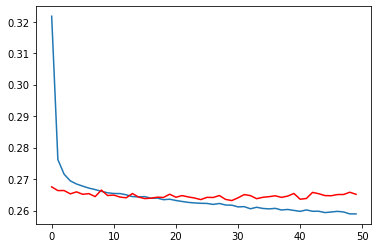

In [102]:
plt.plot(range(0,50),hist['loss'])
plt.plot(range(0,50),hist['val_loss'],color='r')  # we can see that val_loss almost remains constant

**TASK: Create predictions from the X_test set and display a classification report and confusion matrix for the X_test set.**

In [105]:
pred=base_model.predict_classes(X_test)

In [106]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [107]:
accuracy_score(y_test,pred)

0.8851025795008589

In [108]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.97      0.44      0.61     14385
           1       0.88      1.00      0.93     57218

    accuracy                           0.89     71603
   macro avg       0.92      0.72      0.77     71603
weighted avg       0.89      0.89      0.87     71603



**TASK: Given the customer below, would you offer this person a loan?**

In [ ]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

In [ ]:
# CODE HERE

**TASK: Now check, did this person actually end up paying back their loan?**

In [ ]:
# CODE HERE

# GREAT JOB!